Dallin Nielson\
DSC 530 - Data Exploration and Analysis\
Week 5 Exercises

In [1]:
import os

os.chdir(r'C:\Users\dalli\OneDrive\Documents\Education\DSC 530 - Data Exploration and Analysis\ThinkStats2\code')

import thinkstats2
import thinkplot
import scipy

# Exercises 5-1

In the BRFSS (pg. 55), the distribution of heights is roughly normal with parameters $\mu = 178cm$ and $\sigma = 7.7cm$ for men, and $\mu = 163 cm$ and $\sigma = 7.3 cm$ for women. In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). 

#### 1. What percentage of the U.S. male population is in the height range that is eligible to join Blue Man Group?

In [2]:
# Set the mean and standard deviation for male height
mean_male = 178
std_male = 7.7

# Set the max and min heights in cm. to join Blue Man Group
min_cm = 177.8
max_cm = 185.42

# Get the CDF percentiles for the min and max heights, then get the difference
min_percentile = scipy.stats.norm.cdf(min_cm, loc=mean_male, scale=std_male)
max_percentile = scipy.stats.norm.cdf(max_cm, loc=mean_male, scale=std_male)
diff = max_percentile - min_percentile

print(f'Around {round(diff * 100, 2)}% of the male population is in the',
     'eligible height range to join Blue Man Group.')

Around 34.27% of the male population is in the eligible height range to join Blue Man Group.


# Exercises 5-2

To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters $x_m = 1 m$ and $\alpha = 1.7$, we get a distribution with a reasonable minimum, $1 m$, and median, $1.5 m$.

#### 1. Plot this distribution. 

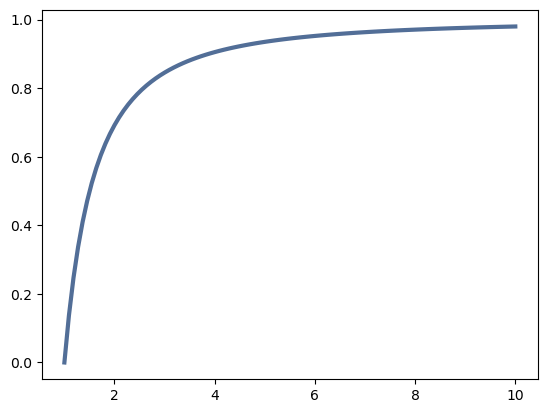

In [3]:
# Declare the x and alpha variables
alpha = 1.7
x_min = 1

# Create and plot the Pareto distribution
p_dist = scipy.stats.pareto(b=alpha, scale=x_min)
xs, ps = thinkstats2.RenderParetoCdf(x_min, alpha, 0, 10.0, n=100)
thinkplot.Plot(xs, ps)

#### 2. What is the mean human height in Pareto world? 

In [4]:
p_mean = p_dist.mean()

print(f'The mean height in a Pareto height world is {round(p_mean, 2)} meters.')

The mean height in a Pareto height world is 2.43 meters.


#### 3. What fraction of the population is shorter than the mean? 

In [5]:
percent_lt_mean = p_dist.cdf(p_mean)

print(f'{round(percent_lt_mean * 100, 2)}% of the population is shorter',
      'than the mean.')

77.87% of the population is shorter than the mean.


#### 4. If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? 

In [6]:
num_gt_1km = 7e9 * (1 - p_dist.cdf(1000))

print(f'We would expect {int(round(num_gt_1km, 0)):,} people to be taller',
      'than 1 km.')

We would expect 55,603 people to be taller than 1 km.


#### 5. How tall do we expect the tallest person to be?

In [7]:
tallest = p_dist.ppf(1 - 1 / 7e9)

print(f'The tallest person would be {round(tallest, 2):,} meters tall.')

The tallest person would be 618,349.61 meters tall.


# Exercises 6-1

The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is. 

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under  5000. The highest range includes respondents who made 250,000 or more.

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is $10^6$, or one million dollars.

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

In [8]:
import hinc
import numpy as np

data = hinc.ReadData()

# Create the InterpolateSample function from ch05soln.py
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


log_sample = InterpolateSample(data)
sample = np.power(10, log_sample)

#### 1. Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. 

In [9]:
print(f'Mean: {round(thinkstats2.Mean(sample), 2):>20,}')
print(f'Median: {round(np.median(sample), 2):>18,}')
print(f'Skewness: {round(thinkstats2.Skewness(sample), 2):>16}')
pearsons = thinkstats2.PearsonMedianSkewness(sample)
print(f"Pearson's Skewness: {round(pearsons, 2):>6}")

Mean:            74,278.71
Median:          51,226.93
Skewness:             4.95
Pearson's Skewness:   0.74


#### 2. What fraction of households report a taxable income below the mean? 

In [10]:
cdf = thinkstats2.Cdf(sample)
lt_mean = cdf.Prob(np.mean(sample))
print(f"{round(lt_mean * 100)}% of households have a taxable income below",
      "the mean.")

66% of households have a taxable income below the mean.


#### 3. How do the results depend on the assumed upper bound?

Because the mean is very susceptible to outliers, the results could be drastically different if we hadn't capped the income at $1 million. The larger the outliers, the greater the skew will be.